<small><small><i>
All the IPython Notebooks in this **Python Decision Tree and Random Forest** series by Dr. Milaan Parmar are available @ **[GitHub](https://github.com/milaan9/90_Python_Examples)**
</i></small></small>

# Visualize a Decision Tree on Iris dataset

In ‘Iris’ dataset we have to create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Train Decision Tree on Classification Task

We'll train a **`DecisionTreeClassifier`** on **Iris** dataset and we'll also use default hyper-parameters for the classifier.

<div>
<img src="img/iris.png" width="500"/>
</div>

<div>
<img src="img/irisFlow.png" width="525"/>
</div>

## Decision Tree on Iris Dataset

In [58]:
# Importing libraries in Python

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay 
#from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [59]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [60]:
iris = datasets.load_iris()
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


In [61]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])

Creating a new column “Species” with target values from the dataset, I am using lambda function to apply a function so as to convert the target values which are 0,1,2 to the corresponding target values(“setosa”,”versicolor”,”virginica”)

In [62]:
data['Species']=iris['target']

In [63]:
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

## Explore the dataset

In [64]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
data.isnull().any()

Petal length    False
Petal Width     False
Sepal Length    False
Sepal Width     False
Species         False
dtype: bool

In [66]:
data.dtypes

Petal length    float64
Petal Width     float64
Sepal Length    float64
Sepal Width     float64
Species          object
dtype: object

In [67]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Perform pair plotting to view relationship between the features present in the data

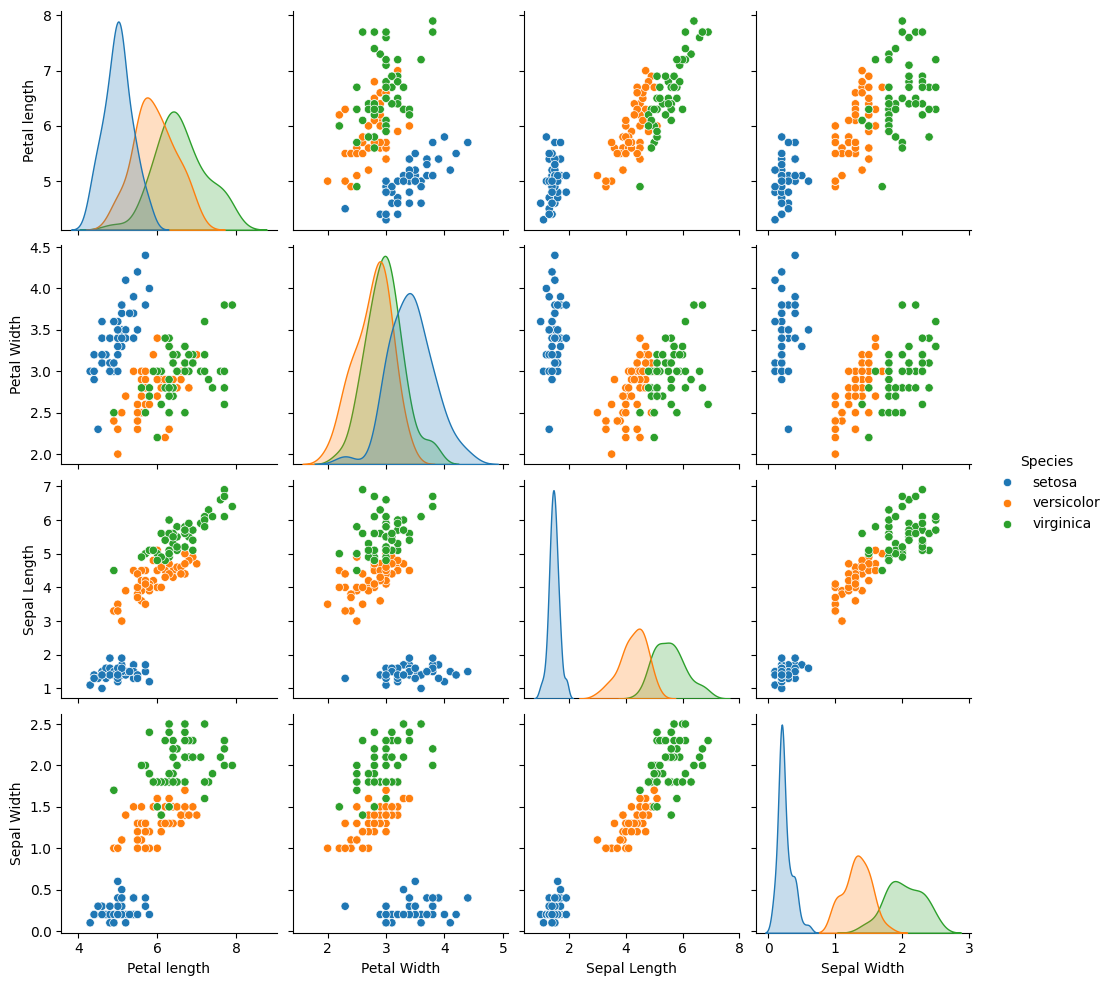

In [68]:
sns.pairplot(data, hue='Species')
plt.show()

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other

## Let's check correlation using heatmap

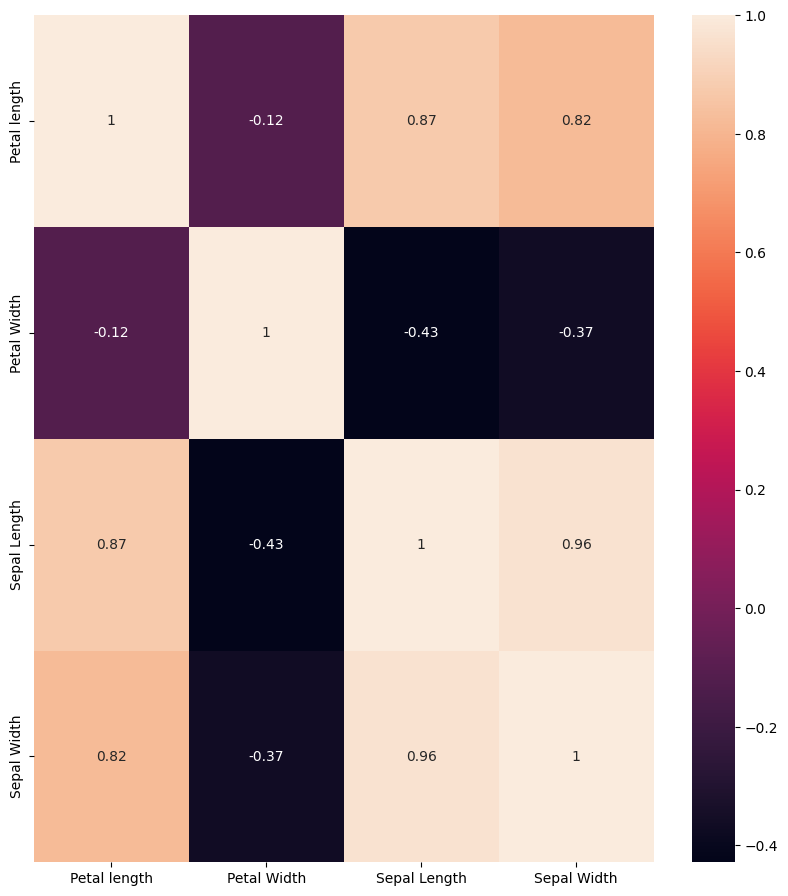

In [69]:
plt.figure(figsize=(10, 11))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True) #sns.heatmap(data.corr(),annot=True)
plt.show()

Observations made -

1. Petal length is highly related to petal width.
2. Sepal lenth is not related sepal width

## Let's see that how the categorical feature “Species” is distributed with all other four input variables.

<Axes: xlabel='Species', ylabel='Petal Width'>

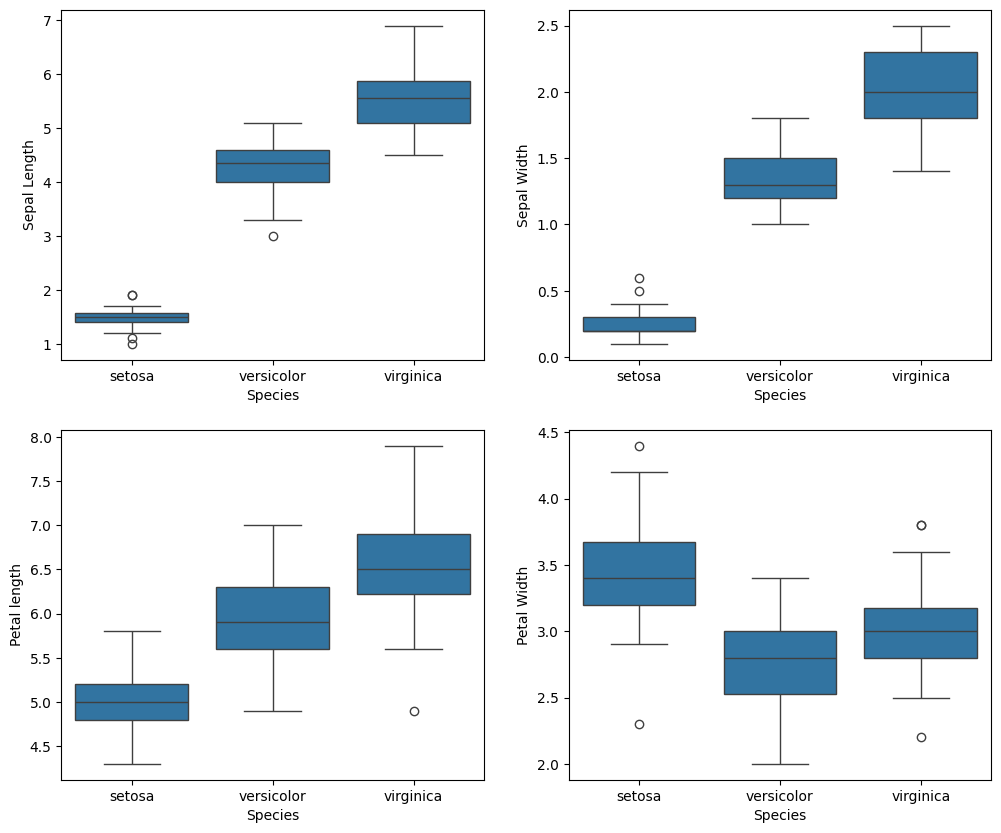

In [70]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal Length",data=data)
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Sepal Width",data=data)
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Petal length",data=data)
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal Width",data=data)

## Preparing the data for classification Model Building

### Split data into train and test set

In [71]:
X = data[["Sepal Length","Sepal Width","Petal length","Petal Width"]].values
Y = data['Species'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=1)

### Train the decision tree classifier

In [72]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

### Test the model trained on test set

In [73]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [74]:
prediction = DT.predict(X_test)
prediction

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

### Perform Evaluation on Test set

In [75]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         6
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## Let's check accuracy of the model build

In [76]:
DT.score(X_test, Y_test)

1.0

In [77]:
#prediction
Y_pred = DT.predict(X_test)

In [78]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 1.0


### Plot Confusion Matrix

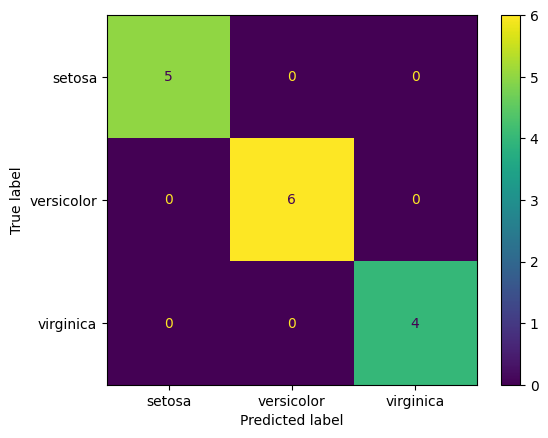

In [79]:
ConfusionMatrixDisplay.from_estimator(DT, X_test, Y_test) 
#plot_confusion_matrix(DT, X_test, Y_test)

### Visualize the Decision Tree

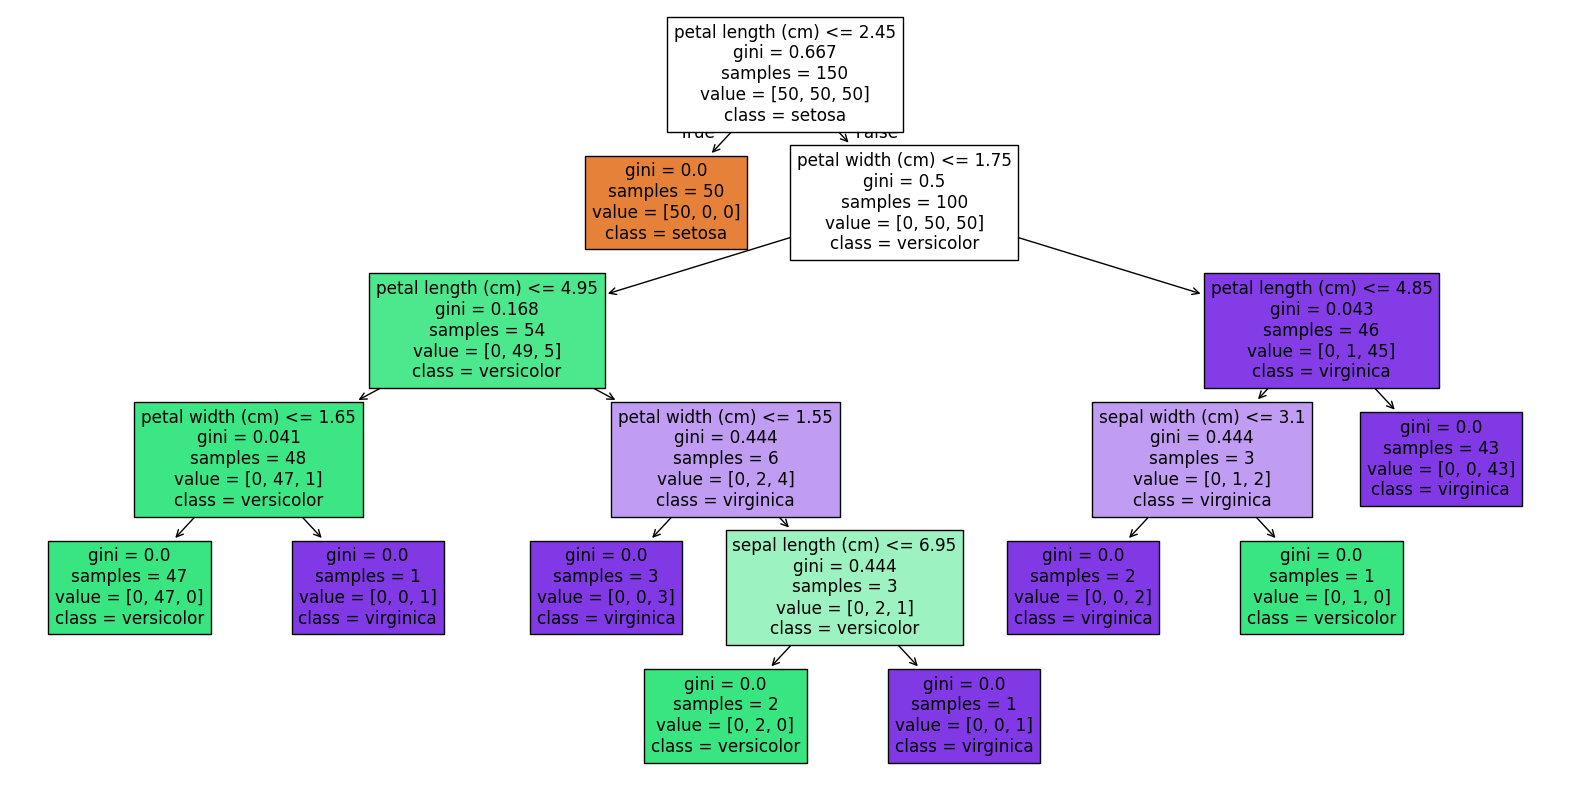

In [80]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train a decision tree classifier
DT = DecisionTreeClassifier()
DT.fit(X, y)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(DT, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


## Now feeding any new/test data to this classifer and it would be able to predict the right class accordingly.

In [81]:
DT.predict([[4.8, 2.9, 1.3, 0.2]])

array([0])

In [82]:
DT.predict([[3.5, 1.9, 5.2, 2.4]])

array([2])

In [83]:
DT.predict([[4.6, 2.9, 3.6, 5.9]])

array([2])